## Warm Up
* Create an xy dataset with 100 points that roughly resembles y = 2x plus some noise
    * Let's seed our random number generator so we all have the same x, y dataset: np.random.seed(0)
* Plot the xy data as a scatter plot

In [30]:
import numpy as np

# np.random.seed(0) # numbers stay the same

x = list(range(100))
y = []
for val in x:
    y.append(val * 2 + np.random.normal(0,25))
# print(y)

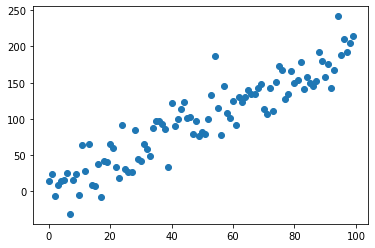

In [31]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

## Intro to Regression
* Recall with supervised machine learning ML, when the attribute we want to predict is categorical, it is a classification task
    * When the attribute is continuous, it is a regression task
* There are lots of regression algorithms (in sci-kit learn, regressors)
    * Linear regression
    * kNN regressor
    * Decision tree regressor
    * Support vector regressor
    * others...
* Goal: fit a line to the xy-data
    * Recall y = mx + b
    * When there is one independent variable(x), it is called simple linear regression
    * There is also multiple linear regression
    * We can then use our y = mx + b model to make predictions for unseen x values

In [32]:
import scipy.stats as stats

m, b, r, p_val, std_err = stats.linregress(x,y)
print("m:", m, "b:", b, "r:", r)

m: 1.9310598487432002 b: 3.340810925238472 r: 0.9262414775121742


In [33]:
# make a prediction for unseen x
test_instance = 100
y_predicted = m * test_instance + b
print("prediction:", y_predicted, "residual (error):", 2 * test_instance - y_predicted)


prediction: 196.44679579955852 residual (error): 3.5532042004414848


In [42]:
# do again but with sci kit learn which supports linear regression
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

# before we call fit, we need to reshape our data, X is matrix and x is vector
X = np.reshape(x, (-1,1)) # 100x1 matrix, list where each element is in its own list
# print(X)
reg.fit(X,y)

y_predicted = reg.predict([[test_instance]]) # makes it a matrix

print("prediction:", y_predicted, "residual (error):", 2 * test_instance - y_predicted)

prediction: [196.4467958] residual (error): [3.5532042]


## Regression Evaluation Metrics
Goal: is to quantify the strength of the relationship between the independent variables (ex: x) and the dependent variable (ex: y)
* Correlation ($r$): a value in the range [-1.0, 1.0]
    * 1.0 means a perfect linear relationship: as x increases, so does y, as x decreases, so does y
    * -1.0 means a perfect **inverse** linear relationship: as x increases, y decreases: as x decreases, y increases
    * At or near 0.0 means little to no linear relationship (x and y are independent)
    * Note: CORRELATION DOES NOT IMPLY CAUSATION
    * Calculate r with `scipy.stats.pearson(x,y)`
* Coefficient of determination ($R^2$): a value in `[0.0,1.0]`
    * The proportion of variation in y that is explained in x
    * The higher your $R^2$, the stronger the relationship between x and y (the better your model)
    * This is the default scoring metric for linear regression in sci kit learn
    


In [46]:
print("r:", r)
print("R^2:", r * r) # 86% of the variation in y is explained x
# 14% of the variation in y cannot be explained by x (noise we added)

r: 0.9262414775121742
R^2: 0.8579232746639356
